In [12]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
with open('cifar/trainLabels.csv') as f:
    labels = pd.read_csv(f)
    
labels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [14]:
labels['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

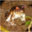

In [15]:
img = Image.open('cifar/train/1.png')
img.convert('RGB')

In [21]:
img_np = np.array(img)

In [22]:
img_np

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

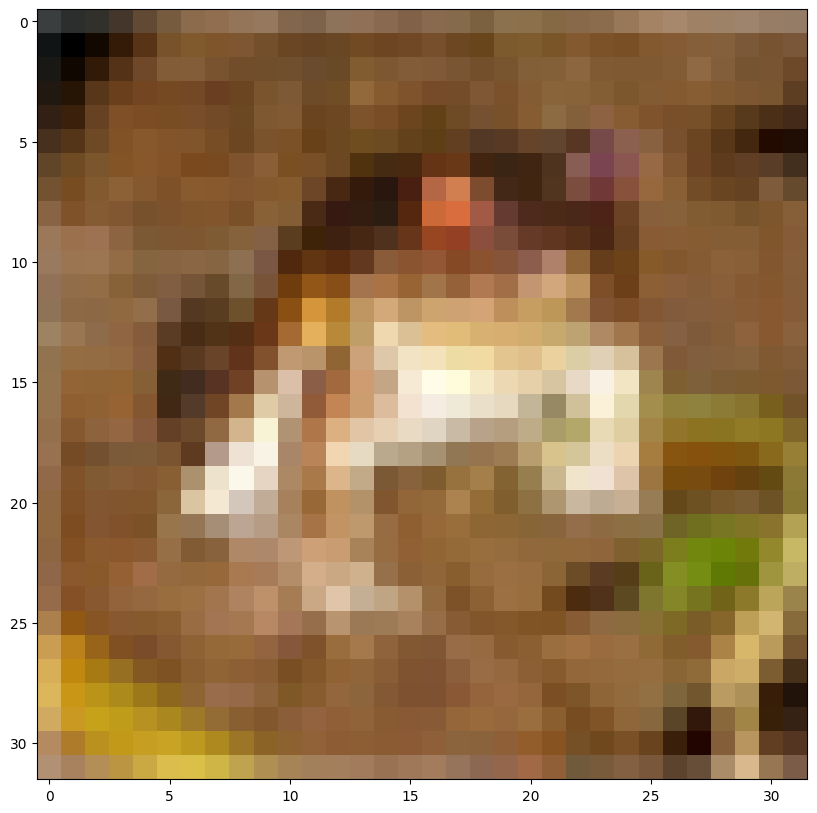

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(img)

## CIFAR-100

In [51]:
import tensorflow as tf
# noinspection PyUnresolvedReferences
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 10s 0us/step


In [52]:
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [56]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

## count number of non zero pixels

In [76]:
from collections import defaultdict, Counter

r = defaultdict(int)
g = defaultdict(int)
b = defaultdict(int)


for i in range(len(X_train)):
    for row in range(len(X_train[i])):
        for col in range(len(X_train[i][row])):
            if X_train[i][row][col][0] > 0:
                r[y_train[i].item()] += 1
            if X_train[i][row][col][1] > 0:
                g[y_train[i].item()] += 1
            if X_train[i][row][col][2] > 0:
                b[y_train[i].item()] += 1

In [87]:
r_train = r.copy()
g_train = g.copy()
b_train = b.copy()

In [88]:
for i in range(len(X_test)):
    for row in range(len(X_test[i])):
        for col in range(len(X_test[i][row])):
            if X_test[i][row][col][0] > 0:
                r[y_test[i].item()] += 1
            if X_test[i][row][col][1] > 0:
                g[y_test[i].item()] += 1
            if X_test[i][row][col][2] > 0:
                b[y_test[i].item()] += 1

In [89]:
l = []

for i in range(100):
    l.append([r[i], g[i], b[i], 600])

In [90]:
import requests

input_data = [125, 245, 0, 10000]

def query(input_data):
    response = requests.post('http://count-cifar.advml.com/score', json={'data': input_data})
    return response.json()

query(input_data)

{'message': 'Wrong shape - should be (100, 4)'}

In [91]:
query(l)

{'message': 'Try again!'}

## each channel highest value

In [92]:

r = defaultdict(int)
g = defaultdict(int)
b = defaultdict(int)


for i in range(len(X_train)):
    for row in range(len(X_train[i])):
        for col in range(len(X_train[i][row])):
            if X_train[i][row][col][0] > r[y_train[i].item()]:
                r[y_train[i].item()] = X_train[i][row][col][0]
            if X_train[i][row][col][1] > g[y_train[i].item()]:
                g[y_train[i].item()] = X_train[i][row][col][1]
            if X_train[i][row][col][2] > b[y_train[i].item()]:
                b[y_train[i].item()] = X_train[i][row][col][2]

In [101]:
l = []

for i in range(100):
    l.append([int(r[i]), int(g[i]), int(b[i]), 600])

In [102]:
query(l)

{'message': 'Try again!'}

In [ ]:
for i in range(len(X_test)):
    for row in range(len(X_test[i])):
        for col in range(len(X_test[i][row])):
            if X_test[i][row][col][0] > r[y_test[i].item()]:
                r[y_test[i].item()] = X_test[i][row][col][0]
            if X_test[i][row][col][1] > g[y_test[i].item()]:
                g[y_test[i].item()] = X_test[i][row][col][1]
            if X_test[i][row][col][2] > b[y_test[i].item()]:
                b[y_test[i].item()] = X_test[i][row][col][2]

In [ ]:
l = []

for i in range(100):
    l.append([r[i], g[i], b[i], 600])

In [ ]:
query(l)

## most common value

In [118]:


l = []
for c in range(100):
    r = defaultdict(int)
    g = defaultdict(int)
    b = defaultdict(int)
    ids = np.where(y_train == c)[0]
    for i in ids:
        for row in range(len(X_train[i])):
            for col in range(len(X_train[i][row])):
                r[X_train[i][row][col][0]] += 1
                g[X_train[i][row][col][1]] += 1
                b[X_train[i][row][col][2]] += 1
    l.append([Counter(r).most_common(1)[0][0], Counter(g).most_common(1)[0][0], Counter(b).most_common(1)[0][0], 500])

In [121]:
l1 = []
    
for x,y,z,w in l:
    l1.append([int(x),int(y),int(z),w])

In [124]:
l2 = []
for c in range(100):
    r = defaultdict(int)
    g = defaultdict(int)
    b = defaultdict(int)
    ids = np.where(y_test == c)[0]
    for i in ids:
        for row in range(len(X_test[i])):
            for col in range(len(X_test[i][row])):
                r[X_test[i][row][col][0]] += 1
                g[X_test[i][row][col][1]] += 1
                b[X_test[i][row][col][2]] += 1
    l2.append([int(Counter(r).most_common(1)[0][0]), int(Counter(g).most_common(1)[0][0]), int(Counter(b).most_common(1)[0][0]), 100])

In [125]:
for i in range(100):
    l1[i][0] += l2[i][0]
    l1[i][1] += l2[i][1]
    l1[i][2] += l2[i][2]
    l1[i][3] += l2[i][3]

In [127]:
l1

[[510, 510, 510, 600],
 [0, 0, 0, 600],
 [509, 509, 509, 600],
 [258, 299, 166, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [510, 510, 11, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [172, 340, 510, 600],
 [510, 510, 510, 600],
 [510, 510, 276, 600],
 [387, 381, 348, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [353, 386, 321, 600],
 [253, 391, 113, 600],
 [510, 510, 510, 600],
 [510, 291, 74, 600],
 [510, 510, 510, 600],
 [255, 296, 370, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [227, 231, 152, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [3, 242, 278, 600],
 [510, 359, 322, 600],
 [510, 510, 510, 600],
 [177, 192, 94, 600],
 [215, 224, 133, 600],
 [510, 510, 510, 600],
 [510, 375, 352, 600],
 [510, 510, 510, 600],
 [415, 268, 205, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [510, 510, 510, 600],
 [202, 192, 117, 600],
 [272, 220, 114, 600],

In [128]:
for i in range(100):
    l1[i][3] = 10000

In [130]:
query(l2)

{'message': 'Try again!'}